In [1]:
from matplotlib import pyplot as plt
import cv2, numpy as np, pathlib, os, PIL, PIL.Image, glob
import numpy as np
from skimage import data
from skimage import io, morphology
import tensorflow as tf
import time
from PIL import Image
import skfuzzy as fuzz
import math
import timeit

from sklearn.metrics import accuracy_score as acc, auc, f1_score
import warnings

width = 512
height = 512
dim = (width, height)

In [8]:
im1 = cv2.imread('IMG/NR/Nr- (1).jpg')
# im1 = cv2.imread('IMG/AbNR/IDRiD_001.jpg')

im1 = im1[:,:,1]
im1 = cv2.resize(im1,dim, interpolation = cv2.INTER_AREA).reshape(width,height)

# gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
ret,bin = cv2.threshold(im1,18,255,cv2.THRESH_BINARY)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(bin,kernel,iterations = 1)


edges_DR = cv2.Canny(im1,20,40)
result = cv2.bitwise_and(edges_DR,edges_DR,mask = erosion)

In [68]:
cv2.imshow("win",result)
cv2.waitKey(2000)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [5]:
width = 512
height = 512
dim = (width, height)
im1 = im1[:,:,1]
im1 = cv2.resize(im1,dim, interpolation = cv2.INTER_AREA).reshape(width,height)
imcomp = (255 - im1)

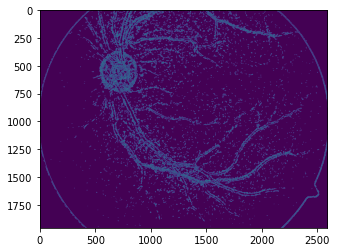

In [20]:

fig, ax = plt.subplots()
im = ax.imshow(result)
plt.show()

###

In [5]:
img = img_back.reshape(512,512,-1)

NameError: name 'img_back' is not defined

In [15]:
k1 = np.array([[1 ,0, 1],[1,1,1],[0,0,1]])
k2 = np.array([[1 ,0, 1],[0,-1,1],[0,1,-1]])
k3 = np.array([[1 ,-1, 1],[1,0,1],[0,1,1]])


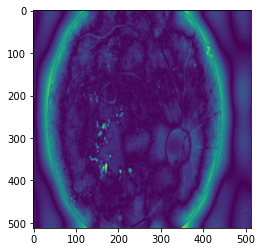

In [157]:
# i2 = cv2.filter2D(src=imcomp, ddepth=-1, kernel=k2)
#
fig, ax = plt.subplots()
im = ax.imshow(img_back)
plt.show()


In [152]:
cv2.imshow("win",img_back)
cv2.waitKey(10000)

cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [134]:
dft = cv2.dft(np.float32(im1),flags=cv2.DFT_COMPLEX_OUTPUT)

In [135]:
dft_shift = np.fft.fftshift(dft)


C:\Users\RAPTOR\AppData\Local\Temp/ipykernel_5608/2217930685.py:50: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


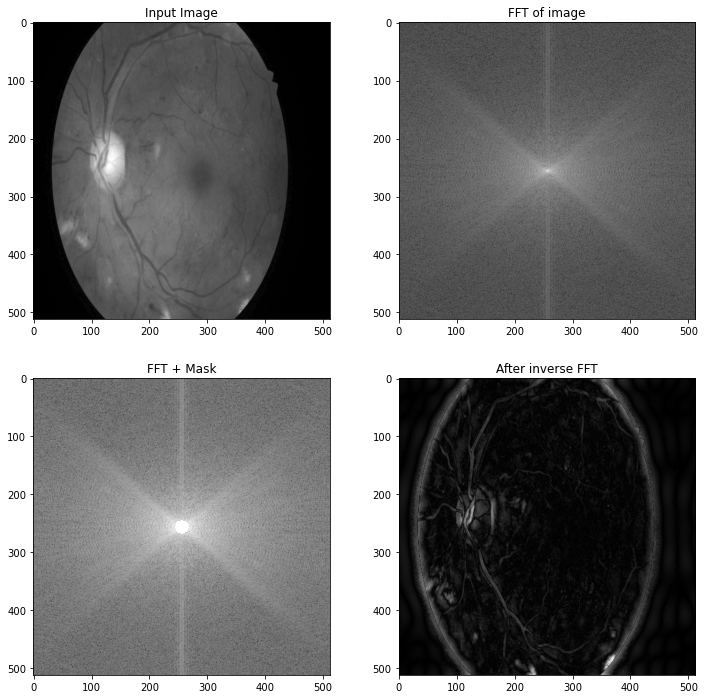

In [136]:
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


# Circular HPF mask, center circle is 0, remaining all ones
#Can be used for edge detection because low frequencies at center are blocked
#and only high frequencies are allowed. Edges are high frequency components.
#Amplifies noise.

rows, cols = im1.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0


# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.
#
"""
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1
"""


# apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(im1, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()

In [136]:


th3 = cv2.adaptiveThreshold(img_grey,25,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

In [215]:
_,im_bw = cv2.threshold(img_back_, 10,100,cv2.THRESH_BINARY)

In [112]:



cv2.imshow("win",img_back)
cv2.waitKey(10000)

cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [14]:
img_back_ = img_back.astype(np.uint8)

In [18]:
img_back.shap

(512, 512)

In [208]:
img_back_

array([[124, 204,  38, ...,  34, 249, 149],
       [175,  15, 178, ..., 226,   4, 184],
       [ 22,  63, 248, ..., 101,  64, 138],
       ...,
       [120,  73, 106, ...,  46, 128, 123],
       [ 46,  54,  90, ..., 130, 246, 186],
       [228, 191, 158, ..., 142, 126, 121]], dtype=uint8)

###

In [4]:
m0 = np.array([[-5 ,3, 3],[-5,0,5],[-5,3,3]])
m1 = np.array([[3 ,3, 3],[-5,0,3],[-5,-5,3]])
m2 = np.array([[3 ,3, 3],[3,0,3],[-5,-5,-5]])
m3 = np.array([[3 ,3, 3],[3,0,-5],[3,-5,-5]])
m4 = np.array([[3 ,3,-5],[3,0,-5],[3,3,-5]])
m5 = np.array([[3 ,-5, -5],[3,0,-5],[3,3,3]])
m6 = np.array([[-5 ,-5, -5],[3,0,3],[3,3,3]])
m7 = np.array([[-5 ,-5, 3],[-5,0,3],[3,3,3]])

In [5]:
m0,m1,m2,m3,m4,m5,m6,m7


(array([[-5,  3,  3],
        [-5,  0,  5],
        [-5,  3,  3]]),
 array([[ 3,  3,  3],
        [-5,  0,  3],
        [-5, -5,  3]]),
 array([[ 3,  3,  3],
        [ 3,  0,  3],
        [-5, -5, -5]]),
 array([[ 3,  3,  3],
        [ 3,  0, -5],
        [ 3, -5, -5]]),
 array([[ 3,  3, -5],
        [ 3,  0, -5],
        [ 3,  3, -5]]),
 array([[ 3, -5, -5],
        [ 3,  0, -5],
        [ 3,  3,  3]]),
 array([[-5, -5, -5],
        [ 3,  0,  3],
        [ 3,  3,  3]]),
 array([[-5, -5,  3],
        [-5,  0,  3],
        [ 3,  3,  3]]))

In [6]:
i0 = cv2.filter2D(src=im1, ddepth=-1, kernel=m0)
i1 = cv2.filter2D(src=im1, ddepth=-1, kernel=m1)
i2 = cv2.filter2D(src=im1, ddepth=-1, kernel=m2)
i3 = cv2.filter2D(src=im1, ddepth=-1, kernel=m3)
i4 = cv2.filter2D(src=im1, ddepth=-1, kernel=m4)
i5 = cv2.filter2D(src=im1, ddepth=-1, kernel=m5)
i6 = cv2.filter2D(src=im1, ddepth=-1, kernel=m6)
i7 = cv2.filter2D(src=im1, ddepth=-1, kernel=m7)





In [7]:
th, im_gray_th_otsu = cv2.threshold(i0, 128, 255, cv2.THRESH_OTSU  )
c = cv2.medianBlur(im_gray_th_otsu,1)

In [8]:
# c = 255- im_gray_th_otsu

In [9]:
c = cv2.medianBlur(c,1)

In [11]:
cv2.imshow("win",c)
cv2.waitKey(2000)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [12]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels


In [13]:
def convolve(img):
    
    _size = calculate_target_size(
        img_size=im1.shape[0],
        kernel_size=m0.shape[0])
    
    
    k = m0.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(width, height))
    
    # Iterate over the rows
    for i in range(_size):
        # Iterate over the columns
        for j in range(_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            
            r0 = abs(np.sum(np.multiply(mat, m0)))
            r1 = abs(np.sum(np.multiply(mat, m1)))
            r2 = abs(np.sum(np.multiply(mat, m2)))
            r3 = abs(np.sum(np.multiply(mat, m3)))
            r4 = abs(np.sum(np.multiply(mat, m4)))
            r5 = abs(np.sum(np.multiply(mat, m5)))
            r6 = abs(np.sum(np.multiply(mat, m6)))
            r7 = abs(np.sum(np.multiply(mat, m7)))

            convolved_img[i, j] = max(r1,r2,r3,r4,r5,r6,r7)

            
    return convolved_img


In [14]:

img_sharpened = convolve(img=im1).astype("uint8")


In [15]:
img_sharpened.shape

(512, 512)

In [16]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

In [17]:
img_sharpened2 = cv2.filter2D(src=img_sharpened, ddepth=-1, kernel=sharpen)
th, img_sharpened2 = cv2.threshold(img_sharpened2, 200, 255, cv2.THRESH_BINARY )

In [23]:
# img_sharpened2= cv2.medianBlur(img_sharpened2, 1)

img_sharpened2 = img_sharpened2>0
cleaned = morphology.remove_small_objects(im_gray_th_, min_size=50, connectivity=3)
img_sharpened2 = toimage(cleaned)


NameError: name 'im_gray_th_' is not defined

In [271]:
cv2.imshow("Vessel seg",img_sharpened2)
cv2.waitKey(4000)
cv2.destroyAllWindows()
cv2.waitKey(1)



-1

In [283]:

th, im_gray_th_ = cv2.threshold(
    img_sharpened, 90, 255, cv2.THRESH_BINARY )
im_gray_th_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [284]:
# im_gray_th_ = cv2.medianBlur(im_gray_th_, 1)

In [285]:
im_gray_th_ = im_gray_th_>0
cleaned = morphology.remove_small_objects(im_gray_th_, min_size=64, connectivity=3)

In [286]:
cv2.imshow("Vessel seg",toimage(cleaned))
cv2.waitKey(4000)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [287]:
a = cv2.adaptiveThreshold(img_sharpened,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 25)

In [288]:
a=cv2.threshold(img_sharpened, 100, 255, cv2.THRESH_OTSU )[1]


In [185]:
a= cv2.medianBlur(a, 3)

In [13]:
cv2.imshow("Vessel seg",a)
cv2.waitKey(4000)
cv2.destroyAllWindows()
cv2.waitKey(1)


NameError: name 'a' is not defined

In [294]:
edg = cv2.filter2D(src=img_sharpened, ddepth=-1, kernel=sharpen)


th, edg = cv2.threshold(edg, 128, 255, cv2.THRESH_BINARY )


edg = cv2.filter2D(src=edg, ddepth=-1, kernel=sharpen)
# edg= cv2.medianBlur(edg, 1)
edg= edg>0
edg = morphology.remove_small_objects(edg, min_size=64, connectivity=2)

cv2.imshow("Vessel seg",toimage(edg))
cv2.waitKey(2000)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

###

In [96]:
# clahe = cv2.createCLAHE(clipLimit=4)
# dst = clahe.apply(im1)
######################################
# _,dst = cv2.threshold(im1,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU) ## mask

#########################################

# kernel = np.ones((2,2),np.uint8)

im1 = cv2.imread('image34_training.jpg')
im1 = im1[:,:,1]
# im1[im1<=30] = 0
im1 = cv2.resize(im1,dim, interpolation = cv2.INTER_AREA).reshape(width,height)

# clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(16,16))
# im1 = clahe.apply(im1)

# ret,bin = cv2.threshold(im1,18,255,cv2.THRESH_BINARY)
# kernel = np.ones((5,5),np.uint8)
# erosion = cv2.erode(bin,kernel,iterations = 1)


# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
# im2 = cv2.morphologyEx(im1, cv2.MORPH_OPEN, kernel, iterations = 1)
# im2 = cv2.morphologyEx(im2, cv2.MORPH_CLOSE, kernel, iterations = 1)

# im1 = cv2.subtract(im2, im1)
# clahe2 = cv2.createCLAHE(clipLimit=16.0, tileGridSize=(3,3))
# im1 = clahe2.apply(im1)

# im1 = cv2.medianBlur(cv2.GaussianBlur(im1,(3,3),0), 3)


# _,dst = cv2.threshold(im1,18,255, cv2.THRESH_BINARY)

# img_adth = dst > 0
# cleaned = morphology.remove_small_objects(img_adth, min_size=150)
# cleaned = morphology.remove_small_holes(cleaned, 2)

# img_clth = toimage(cleaned)





dst = cv2.adaptiveThreshold(im1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)
dst=cv2.threshold(dst, 100, 255, cv2.THRESH_OTSU )[1]
dst = cv2.medianBlur(dst,1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
dst = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel, iterations=1)


dst = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)
# th, dst = cv2.threshold(dst, 10, 255, cv2.THRESH_BINARY_INV )

dst = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)
dst = 255 - dst

dst = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)

kernel = np.ones((1,1),np.uint8)
dst = cv2.erode(dst,kernel,iterations = 1)




# dst2 = cv2.medianBlur(dst,1)

dst2 = cv2.morphologyEx(dst, cv2.MORPH_DILATE, kernel)





# dst = cv2.medianBlur(dst,3)


dst2 = dst > 0

# print(acc(img_clth.flatten(),gt.flatten()))
# cv2.imshow("Vessel seg",img_clth)
# cv2.waitKey(6000)
# cv2.destroyAllWindows()
# cv2.waitKey(1)


In [59]:
# dst = dst.astype('bool')
dst2

array([[ True,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

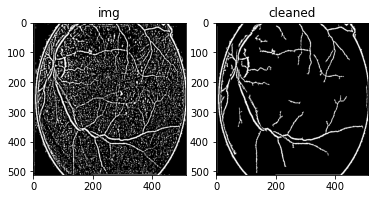

In [99]:

cleaned = morphology.remove_small_objects(dst2, min_size=120)
cleaned = morphology.remove_small_holes(cleaned, 2)

# cleaned = morphology.remove_small_objects(dst2, min_size=100, connectivity=2)

fig, axs = plt.subplots(1, 2)

axs[0].imshow(dst2, cmap='gray')
axs[0].set_title('img')
axs[1].imshow(cleaned, cmap='gray')
axs[1].set_title('cleaned')
plt.show(fig)



In [2]:
def toimage(cleaned):
    r,c = cleaned.shape
    cleaned = cleaned.astype('uint8')
    for i in range(1,r):
        for j in range(1,c):
            if cleaned[i][j]==1:
                cleaned[i][j]=255
                
    kernel = np.ones((1,1),np.uint8)
    cleaned = cv2.erode(cleaned,kernel,iterations = 1)
    kernel = np.ones((1,1),np.uint8)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_DILATE, kernel)
    
    
    cleaned = cv2.bitwise_and(cleaned,cleaned,mask = erosion)


    
    
    return cleaned

In [61]:
gt = cv2.imread(r"CHASEDB1/GT/Image_14R_1stHO.png")
gt = gt[:,:,1]
gt = cv2.resize(gt,dim, interpolation = cv2.INTER_AREA).reshape(width,height)

cat =  np.hstack((gt,toimage(cleaned)))
cv2.imshow("Vessel seg",toimage(cleaned))

cv2.waitKey(6000)

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [42]:
acc(toimage(cleaned).flatten(),gt.flatten())

0.8703689575195312

In [100]:
imge = toimage(cleaned)
# imge = 255- imge

In [102]:

img_sub = cv2.subtract(imge, im1)
cv2.imshow("Vessel seg",imge)

cv2.waitKey(0)


-1

In [4]:
def toimage(cleaned, mask):
    r,c = cleaned.shape
    cleaned = cleaned.astype('uint8')
    for i in range(1,r):
        for j in range(1,c):
            if cleaned[i][j]==1:
                cleaned[i][j]=255
                
    kernel = np.ones((1,1),np.uint8)
    cleaned = cv2.erode(cleaned,kernel,iterations = 1)
    kernel = np.ones((1,1),np.uint8)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_DILATE, kernel)
    cleaned = cv2.bitwise_and(cleaned,cleaned,mask = mask)
    
    return cleaned

def pre_process(i, NORMAL= True):
    
    # dim = (200,200)
    im1 = cv2.imread(i)
    im1 = im1[:,:,1]
    im1 = cv2.resize(im1,dim, interpolation = cv2.INTER_AREA).reshape(dim[0],dim[1])
    
    ret,bin = cv2.threshold(im1,18,255,cv2.THRESH_BINARY)
    kernel = np.ones((5,5),np.uint8)
    mask = cv2.erode(bin,kernel,iterations = 1)

    # clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(3,3))
    # im1 = clahe.apply(im1)

    dst = cv2.adaptiveThreshold(im1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)
    dst=cv2.threshold(dst, 100, 255, cv2.THRESH_OTSU )[1]
    dst = cv2.medianBlur(dst,1)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
    dst = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)


    dst = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)
    dst = 255 - dst

    dst2 = cv2.morphologyEx(dst, cv2.MORPH_DILATE, kernel)


    dst2 = dst > 0

    if NORMAL:

        cleaned = morphology.remove_small_objects(dst2, min_size=120) #For Normal = 120
        cleaned = morphology.remove_small_holes(cleaned, 2)
    
    else:
        
        cleaned = morphology.remove_small_objects(dst2, min_size=40) #For Abnormal = 40
        cleaned = morphology.remove_small_holes(cleaned, 2)
        
    cat =  np.hstack((im1,toimage(cleaned,mask)))
    
    return cat, toimage(cleaned,mask)
    
    



In [43]:
data_dir = pathlib.Path('CHASEDB1/IMG/').with_suffix('')
data = data_dir.glob('*.*')

data_dir2 = pathlib.Path('CHASEDB1/GT/').with_suffix('')
gt = data_dir2.glob('*.*')


accu =[]
seg =[]
act =[]

for i in data:
    _,im = pre_process(str(i))
    seg.append(im)

for i in gt:
    dim = (512,512)
    im1 = cv2.imread(str(i))
    im1 = im1[:,:,1]
    im1 = cv2.resize(im1,dim, interpolation = cv2.INTER_AREA).reshape(dim[0],dim[1])
    act.append(im1)
    
    


In [32]:
from statistics import mean
from sklearn.metrics import roc_curve, auc as AUC
import skimage
accu=[]
f1=[]
for i in range(len(seg)):
    accu.append(acc(act[i].ravel(),seg[i].ravel()))
    # f1.append(f1_score(act[i].ravel(),seg[i].ravel(), average ='weighted'))



round(mean(accu),3)
# ,round(mean(f1),3)

0.916

In [33]:
from sklearn import metrics
import numpy as np

# Flatten and convert to 1D arrays
act_flat = [arr.flatten() for arr in act]
seg_flat = [arr.flatten() for arr in seg]

act_1d = np.concatenate(act_flat)
seg_1d = np.concatenate(seg_flat)

# Calculate metrics with "weighted" average
precision = metrics.precision_score(act_1d, seg_1d, average='weighted',zero_division=0)
recall = metrics.recall_score(act_1d, seg_1d, average='weighted',zero_division=0)
f1 = metrics.f1_score(act_1d, seg_1d, average='weighted',zero_division=0)
accuracy = metrics.accuracy_score(act_1d, seg_1d)

print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))
print('Accuracy: {} %'.format(accuracy * 100))


Precision: 0.8821881784088935
Recall: 0.9157615389142718
F1 Score: 0.8971355688982615
Accuracy: 91.57615389142718 %


In [35]:
data_dir = pathlib.Path('HRF/NR/').with_suffix('')
data = data_dir.glob('*.*')

data_dir2 = pathlib.Path('HRF/SEG/').with_suffix('')
gt = data_dir2.glob('*.*')


accu =[]
seg =[]
act =[]

for i in data:
    _,im = pre_process(str(i))
    seg.append(im)

for i in gt:
    dim = (512,512)
    im1 = cv2.imread(str(i))
    im1 = im1[:,:,1]
    im1 = cv2.resize(im1,dim, interpolation = cv2.INTER_AREA).reshape(dim[0],dim[1])
    act.append(im1)
    
    


In [6]:
from statistics import mean
from sklearn.metrics import roc_curve, auc as AUC
import skimage
accu=[]
f1=[]
for i in range(len(seg)):
    accu.append(acc(act[i].ravel(),seg[i].ravel()))
    # f1.append(f1_score(act[i].ravel(),seg[i].ravel(), average ='weighted'))



round(mean(accu),3)
# ,round(mean(f1),3)

0.877

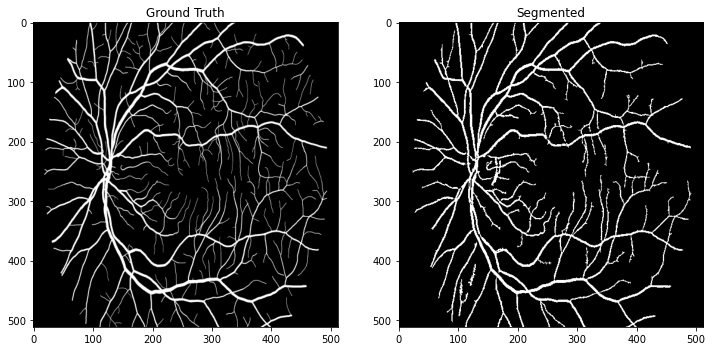

In [42]:

fig, axs = plt.subplots(1, 2,figsize=(12, 12))

axs[0].imshow(act[5], cmap='gray')
axs[0].set_title('Ground Truth')
axs[1].imshow(seg[5], cmap='gray')
axs[1].set_title('Segmented')
plt.show(fig)

In [29]:
from sklearn import metrics
import numpy as np

# Flatten and convert to 1D arrays
act_flat = [arr.flatten() for arr in act]
seg_flat = [arr.flatten() for arr in seg]

act_1d = np.concatenate(act_flat)
seg_1d = np.concatenate(seg_flat)

# Calculate metrics with "weighted" average
precision = metrics.precision_score(act_1d, seg_1d, average='weighted',zero_division=0)
recall = metrics.recall_score(act_1d, seg_1d, average='weighted',zero_division=0)
f1 = metrics.f1_score(act_1d, seg_1d, average='weighted',zero_division=0)
accuracy = metrics.accuracy_score(act_1d, seg_1d)

print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))
print('Accuracy: {} %'.format((accuracy * 100))


Precision: 0.7972792018164322
Recall: 0.8765543619791667
F1 Score: 0.8321952780814601
Accuracy: 87.65543619791667 %


In [5]:
data_dir = pathlib.Path('IMG').with_suffix('')
import glob
NR = data_dir.glob('NR/*.*')
AbNR = data_dir.glob('AbNR/*.*')

data = []
labels = []
dim = (512,512)
n=1

for i in NR:   
    
    s = str(n)
    Path = r'C:\Users\RAPTOR\Desktop\Thesis\CODE\PRO_IMG\Normal\NR_'+s+'.jpeg'
    _,im = pre_process(str(i))
    
    cv2.imwrite(str(Path),im)
    cv2.waitKey(0)
    n+=1
    data.append(im)
    labels.append(0)
    
n=1
    
for i in AbNR:   
    s = str(n)
    Path = r'C:\Users\RAPTOR\Desktop\Thesis\CODE\PRO_IMG\AbNormal\AbNR_'+s+'.jpeg'
    _,im = pre_process(str(i))
    
    cv2.imwrite(str(Path),im)
    cv2.waitKey(0)
    n+=1
    data.append(im)
    labels.append(1)
    

data = np.array(data)
labels = np.array(labels)




In [23]:
def encode(labels):

    from sklearn.preprocessing import OneHotEncoder
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = labels.reshape(len(labels), 1)           #before labels_batch
    label_encoded = onehot_encoder.fit_transform(integer_encoded)
    return label_encoded


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, encode(labels), test_size=0.15,
                                                random_state=42)


In [25]:
data_dir = pathlib.Path('IMG2').with_suffix('')
import glob
NR = data_dir.glob('NR/*.*')
AbNR = data_dir.glob('AbNR/*.*')

data2 = []
labels2 = []
n=1

for i in NR:   
    
    # s = str(n)
    # Path = r'C:\Users\RAPTOR\Desktop\Thesis\CODE\PRO_IMG\NR\NR_'+s+'.jpeg'
    _,im = pre_process(str(i))
    
#     cv2.imwrite(str(Path),_)
#     cv2.waitKey(0)
#     n+=1
    data2.append(im)
    labels2.append(0)
    
n=1
    
for i in AbNR:   
    # s = str(n)
    # Path = r'C:\Users\RAPTOR\Desktop\Thesis\CODE\PRO_IMG\AbNR\AbNR_'+s+'.jpeg'
    _,im = pre_process(str(i),False)
    
#     cv2.imwrite(str(Path),_)
#     cv2.waitKey(0)
#     n+=1
    data2.append(im)
    labels2.append(1)
    

data2 = np.array(data2)
labels2 = np.array(labels2)




In [26]:
from sklearn.model_selection import train_test_split
X_traind2, X_testd2, ytraind2, ytestd2 = train_test_split(data2, encode(labels2), test_size=0.001,
                                                random_state=42)


In [27]:
import tensorflow as tf

def get_model(width, height):

    inputs = tf.keras.Input((width, height, 1))
    conv1 = tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=1)(inputs)
    BN1 = tf.keras.layers.BatchNormalization()(conv1)
    relu1 = tf.keras.layers.Activation(activation='relu')(BN1)
    
    conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2,padding='same')(relu1)
    BN2 = tf.keras.layers.BatchNormalization()(conv2)
    relu2 = tf.keras.layers.Activation(activation='relu')(BN2)
    
    conv3 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,padding='same')(relu2)
    BN3 = tf.keras.layers.BatchNormalization()(conv3)
    relu3 = tf.keras.layers.Activation(activation='relu')(BN3)
    
    skipconv = tf.keras.layers.Conv2D(filters=32, kernel_size=1, strides=2)(relu1)
    
    Add = tf.keras.layers.Add()([skipconv,relu3])
    AvgPool = tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2)(Add)
    FC = tf.keras.layers.Flatten()(AvgPool)
    
    output = tf.keras.layers.Dense(2,activation='softmax')(FC)

    
    
    model = tf.keras.Model(inputs, output,name='BASE_MODEL')
    
    return model


# Build model.
model = get_model(dim[0], dim[1])
model.summary()




Model: "BASE_MODEL"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 508, 508, 16  416         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 508, 508, 16  64         ['conv2d_8[0][0]']               
 rmalization)                   )                                                        

In [28]:

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9)

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['acc',tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall()],
)

# Define callbacks.
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "image_classification.h5", save_best_only=True
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="acc", patience=3)


epochs = 10
model.fit(
    x=X_train,
    y=ytrain,
    validation_split=0.1,
    validation_freq=5,
    epochs=epochs,
    shuffle=True,
    batch_size=128,
    
    callbacks=[checkpoint_cb]#, early_stopping_cb],
)

Epoch 1/10
1/1 [==============================] - 178s 178s/step - loss: 0.7299 - acc: 0.5625 - precision_2: 0.5625 - recall_2: 0.5625
Epoch 2/10
1/1 [==============================] - 254s 254s/step - loss: 4.1955 - acc: 0.5938 - precision_2: 0.5938 - recall_2: 0.5938
Epoch 3/10
1/1 [==============================] - 198s 198s/step - loss: 1.1865 - acc: 0.7734 - precision_2: 0.7734 - recall_2: 0.7734
Epoch 4/10
1/1 [==============================] - 177s 177s/step - loss: 0.6225 - acc: 0.8203 - precision_2: 0.8203 - recall_2: 0.8203
Epoch 5/10
1/1 [==============================] - 182s 182s/step - loss: 1.1167 - acc: 0.7266 - precision_2: 0.7266 - recall_2: 0.7266 - val_loss: 1.8019 - val_acc: 0.9333 - val_precision_2: 0.9333 - val_recall_2: 0.9333
Epoch 6/10
1/1 [==============================] - 181s 181s/step - loss: 0.6589 - acc: 0.8672 - precision_2: 0.8672 - recall_2: 0.8672
Epoch 7/10
1/1 [==============================] - 252s 252s/step - loss: 0.1502 - acc: 1.0000 - precisio

In [29]:
from sklearn import metrics

In [30]:
pred = model.predict(X_test).round()
print('Model Classification report \n\n {}'.format(metrics.classification_report(ytest,pred)))
print('Model accuracy  {} %'.format(metrics.accuracy_score(ytest,pred)*100))


1/1 [==============================] - 2s 2s/step
Model Classification report 

               precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.76      1.00      0.87        13

   micro avg       0.85      0.85      0.85        26
   macro avg       0.88      0.85      0.84        26
weighted avg       0.88      0.85      0.84        26
 samples avg       0.85      0.85      0.85        26

Model accuracy  84.61538461538461 %


In [34]:
pred = model.predict(data2).round()
print('Model Classification report \n\n {}'.format(metrics.classification_report(encode(labels2),pred)))
print('Model accuracy  {} %'.format(metrics.accuracy_score(encode(labels2),pred)*100))


6/6 [==============================] - 14s 2s/step
Model Classification report 

               precision    recall  f1-score   support

           0       0.98      0.75      0.85        67
           1       0.86      0.99      0.92       103

   micro avg       0.89      0.89      0.89       170
   macro avg       0.92      0.87      0.88       170
weighted avg       0.91      0.89      0.89       170
 samples avg       0.89      0.89      0.89       170

Model accuracy  89.41176470588236 %


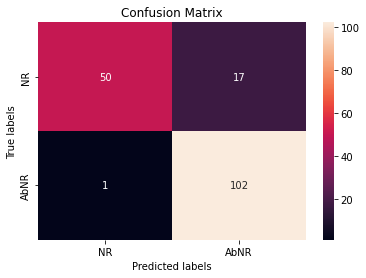

In [35]:
import seaborn as sns
class_names = ['NR','AbNR']  
ax= plt.subplot()
cm = metrics.confusion_matrix(encode(labels2).argmax(axis=1), pred.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);


In [314]:
im1 = cv2.imread('IMG/NR/03_h.jpg')
width = 512
height = 512

G = im1[:,:,1]
G = cv2.resize(G,dim, interpolation = cv2.INTER_AREA).reshape(width,height)

B = im1[:,:,0]
B = cv2.resize(B,dim, interpolation = cv2.INTER_AREA).reshape(width,height)

R=  im1[:,:,2]
R = cv2.resize(R,dim, interpolation = cv2.INTER_AREA).reshape(width,height)

a = cv2.adaptiveThreshold(R,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 13, 2)



# a = cv2.medianBlur(a,1)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))

a = cv2.morphologyEx(a, cv2.MORPH_OPEN, kernel)

a = cv2.medianBlur(a,3)

a= a>0
cleaned = morphology.remove_small_objects(a, min_size=50)
cleaned = morphology.remove_small_holes(cleaned, 2)

cv2.imshow("",toimage(cleaned))
cv2.waitKey(4000)

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [1009]:
img_1 = cv2.equalizeHist(G)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(11,11))
img_2 = clahe.apply(G)

res = np.hstack((G,img_2)) #stacking images side-by-sid



In [234]:

im1 = cv2.imread('IMG/AbNR/IDRiD_046.jpg')

G = im1[:,:,1]
G = cv2.resize(G,dim, interpolation = cv2.INTER_AREA).reshape(width,height)


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_2 = clahe.apply(G)


In [ ]:
im1 = cv2.imread('IMG/NR/00cc2b75cddd.png')

G = im1[:,:,1]
G = cv2.resize(G,dim, interpolation = cv2.INTER_AREA).reshape(width,height)


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_2 = clahe.apply(G)


# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
# dst = cv2.morphologyEx(img_2, cv2.MORPH_CLOSE, kernel)

# th, dst = cv2.threshold(dst, 175, 255, cv2.THRESH_BINARY_INV)

M = 175
w = signal.windows.gaussian(M,1) #Gaussian Window
Ar = G - G.mean() - G.std()        #Preprocessing Red
Thr = 0.5*M - w.std() - Ar.std()              #OD Threshold
r,c=Ar.shape
dd = np.zeros(shape=(r,c))

for i in range(1,r):
    for j in range(1,c):
        if Ar[i,j]>Thr:
            dd[i,j]=255
        else:
            dd[i,j]=0

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
dst = cv2.morphologyEx(dd, cv2.MORPH_CLOSE, kernel)
dst = cv2.morphologyEx(dd, cv2.MORPH_OPEN, kernel)
            
            
# r = cv2.morphologyEx(dst, cv2.MORPH_DILATE, kernel)


R1 = cv2.bitwise_and(G,G, mask= dst)

re = np.hstack((r,G))

cv2.imshow("",R1)
cv2.waitKey(2000)

cv2.destroyAllWindows()
cv2.waitKey(1)